<a href="https://colab.research.google.com/github/DineshReddy0530/Grepthor/blob/master/Grepthor_MLP_MNIST_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

At the end of the experiment, you will be able to :

* understand Multi-Layer Perceptron (MLP)
* tune the hyper-parameters of a MLP classifier

In [0]:
#@title Experiment Walkthrough
#@markdown MLP-MNIST
from IPython.display import HTML

HTML("""<video width="420" height="240" controls>
<source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/experiment_details_backup/mlp_mnist.mp4" type="video/mp4">
</video>
""")

## Dataset

###Description

We use the MNIST dataset for this experiment. Below are the details:

1. The dataset contains 60,000 Handwritten digits as training samples and 10,000 Test samples, 
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately). 
2. Each image is Size Normalized and Centered 
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value. 
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.

### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license. 

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.



## Domain Information


Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)

The experiment handles a subset of text recognition, namely recognizing the 10 numerals (0 to 9) from scanned images.


##AI/ML Technique


A hyperparameter is a parameter whose value is set before the learning process begins.

### What is  MLP ?


A multilayer perceptron is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes as shown in below image: 

**Layer1** :   Input Layer

**Layer 2** :  Hidden Layer

**Layer 3** : Output Layer

![alt text](https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png)

The number of nodes in the input layer is determined by the dimensionality of our data. 

The number of nodes in the output layer is determined by the number of classes we have.


### Keywords

**activation :** 

*  identity 
* logistic  
* tanh 
* relu 


**  Solvers :** 

* lbfgs
* sgd
* adam
  
  
  

#### Importing the required packages

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [0]:
from sklearn.metrics import accuracy_score

Loading the dataset from sklearn package

In [0]:
#Load MNIST datset 
digits = datasets.load_digits(n_class=10)
# Create our X and y data
data = digits.data
target = digits.target

In [0]:
data.shape

(1797, 64)

## You could be wondering why data shape is 1797 above, when MNIST is a 60k training and 10k testing dataset?
 
Well, the original dataset takes time to run thus delaying your observations and learning of the MLP classifier. You are however free to experiment by replacing the line <br/>
**digits = datasets.load_digits(n_class=10)**  in the cell above, with the following: <br/>

<br/>
<br/>
**from sklearn.datasets import fetch_openml <br/>
digits = fetch_openml('mnist_784')** <br/>

However please be aware that this program might run for a really long time !! 




Split  data into training ,testing  sets. This is done easily with SciKit Learn’s train_test_split function.




In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test =  train_test_split(data, target, test_size=0.2, random_state=1)



In [0]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,max_iter = 5000 ,learning_rate = 'constant',learning_rate_init=lr)
    return clf 
#function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

**Let us define the hyper parameters of MLP Classifier**

In [0]:
# activation: Activation functions are critical in introducing non-linearity in MLP (in absence of this all layers of MLP combine into a single layer)
activation = ["identity","logistic","tanh","relu"]
#solvers: The following are the methods by which your weights get updated.
solvers = ["lbfgs","sgd","adam"]
#learning rate
learning_rate = [0.0001,0.001,0.01,0.1]
#hidden layers
hidden_layers = [(5,2),(3,2),(6,3),(7,2),(10,)]

In the below code cell we are trying to train a MLP classifer with different hyper parameters. Here we choose a random index value based on size of the hyper parameters list which are defined above.

In [0]:
test_accuracy = []
validation_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(activation))
    k2 = np.random.randint(0,len(solvers))
    k3 = np.random.randint(0,len(learning_rate))
    k4 = np.random.randint(0,len(hidden_layers))
    print("\nHyper-parameters = \n activation = ", activation[k1],    "\n solver = ", solvers[k2], "\n learning_rate_init = ", learning_rate[k3],         "\n hidden_layer_sizes = ", hidden_layers[k4])
    #calling the mlp function with random hyper paramters
    clf = mlp(activation[k1],solvers[k2],hidden_layers[k4],learning_rate[k3])
    #Fitting the data into model
    clf.fit(X_train,Y_train)
    ## Predicting the values on trained model using train data
    predTrain = clf.predict((X_train))
    #Calculating the train accuracy
    << your code here >>
    # Predicting the values on trained model using test data
    << your code here >>
    #Calculating the test accuracy
    << your code here >>
  
    print("(train,  test) accuracy = ",accuracy(Y_train,predTrain),  accuracy(Y_test,predTest))


Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (6, 3)
(train,  test) accuracy =  0.6931106471816284 0.6527777777777778

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (5, 2)
(train,  test) accuracy =  0.6179540709812108 0.5555555555555556

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (10,)
(train,  test) accuracy =  0.9895615866388309 0.8916666666666667

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (10,)
(train,  test) accuracy =  0.9770354906054279 0.8944444444444445

Hyper-parameters = 
 activation =  identity 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)
(train,  test) accuracy =  0.7585247042449548 0.7333333333333333

Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 le

#### Plotting the accuracies of  train, test  sets; On x-axis in the graph below (once the cell is executed), is the combination of parameters output by the cell above, in sequence.

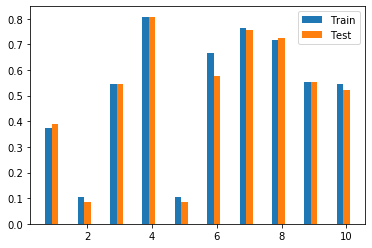

In [0]:
## Plotting the data
xx = np.array(range(1,11))
plt.bar(xx-0.2,train_accuracy,width=0.2)
plt.bar(xx,test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()